# Machine Learning

### Logistic Regression

In [2]:
import pandas as pd

In [3]:
# Load the data
file_path = 'Resources/diabetes_data.csv'
df = pd.read_csv(file_path)
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('Diabetes', axis=1)
y = df['Diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# extracting important features
# Would leaving in PhysHealth, and HvyAlcoholConsump help our model train?
# Because if we leave it in there it would tell the model something along the lines of
# "if it has this feature, they probably don't."
unimportant_features_df = df[['Fruits','MentHlth','PhysActivity','Veggies','PhysHlth','HvyAlcoholConsump']]
important_features_df = df[['GenHlth', 'BMI', 'Age', 'HighBP', 'HighChol', 'CholCheck', 'Sex', 'HeartDiseaseorAttack', 'DiffWalk', 'Stroke']]

In [5]:
from sklearn.linear_model import LogisticRegression


# Train the Logistic Regression model using the orignal dataframe
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=1)

In [6]:
# Calculated the balanced accuracy score of the orignal dataframe
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_test_scaled)
balanced_accuracy_score(y_test, y_pred)

0.7465249585774463

In [7]:
# Display the confusion matrix of the orignal dataframe
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
cm.to_csv('Resources/DashBoard_CSV/LogisticRegression.csv')
cm

,0,1
0,6451,2441
1,2041,6740


In [8]:
# Print the imbalanced classification report of the orignal dataframe
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.76      0.73      0.77      0.74      0.75      0.55      8892
        1.0       0.73      0.77      0.73      0.75      0.75      0.56      8781

avg / total       0.75      0.75      0.75      0.75      0.75      0.56     17673



### Logistic Regression with Top 6 Features

In [9]:
# extracting top 6 important features
top6_features_df = df[['GenHlth', 'BMI', 'Age', 'HighBP', 'HighChol', 'CholCheck']]

#Scaling the Data with the important features used above
X_important = top6_features_df
y_important = df['Diabetes']
X_important_train, X_important_test, y_important_train, y_important_test = train_test_split(X_important, y_important)

scaler = StandardScaler()
X_important_train_scaled = scaler.fit_transform(X_important_train)
X_important_test_scaled = scaler.transform(X_important_test)

In [10]:
# Train the Logistic Regression model using the important dataframe
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_important_train_scaled, y_important_train)

LogisticRegression(random_state=1)

In [11]:
# Calculated the balanced accuracy score of the important dataframe
y_important_pred = model.predict(X_important_test_scaled)
balanced_accuracy_score(y_important_test, y_important_pred)

0.7481025813755724

In [12]:
# Display the confusion matrix of the important dataframe
cm = pd.DataFrame(confusion_matrix(y_important_test, y_important_pred))
cm.to_csv('Resources/DashBoard_CSV/Logistic_Regression_Top6_Features_cm.csv')
cm

,0,1
0,6490,2383
1,2070,6730


In [13]:
# Print the imbalanced classification report of the important dataframe
print(classification_report_imbalanced(y_important_test, y_important_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.76      0.73      0.76      0.74      0.75      0.56      8873
        1.0       0.74      0.76      0.73      0.75      0.75      0.56      8800

avg / total       0.75      0.75      0.75      0.75      0.75      0.56     17673



Extracting important features barely effected results of the accuracy of the logicsitc regression model.

The actual machine learning model will likely have a bigger impact on predictions than the columns included or not.

In [14]:
# extracting top 6 important features
top3_features_df = df[['GenHlth', 'BMI', 'Age']]

#Scaling the Data with the important features used above
X3 = top3_features_df
y3 = df['Diabetes']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3)

scaler = StandardScaler()
X3_train_scaled = scaler.fit_transform(X3_train)
X3_test_scaled = scaler.transform(X3_test)

In [15]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
rf_model = BalancedRandomForestClassifier(n_estimators=100, random_state=1) 
rf_model = rf_model.fit(X3_train_scaled, y3_train)
y3_pred = rf_model.predict(X3_test_scaled)

In [16]:
# Calculated the balanced accuracy score
balanced_accuracy_score(y3_test, y3_pred)

0.7221417957269333

In [17]:
# Display the confusion matrix
cm = pd.DataFrame(confusion_matrix(y3_test, y3_pred))
cm.to_csv('Resources/DashBoard_CSV/Logistic_Regression_Top3_Features_cm.csv')
cm

,0,1
0,5997,2866
1,2047,6763


In [18]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y3_test, y3_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.75      0.68      0.77      0.71      0.72      0.51      8863
        1.0       0.70      0.77      0.68      0.73      0.72      0.52      8810

avg / total       0.72      0.72      0.72      0.72      0.72      0.52     17673



In [19]:
# List the features sorted in descending order by feature importance
importances = rf_model.feature_importances_
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.4017235269312911, 'Age'),
 (0.33786183585660584, 'Sex'),
 (0.260414637212103, 'HighChol')]

### Easy Ensemble Classifier

In [20]:
# Train the EasyEnsembleClassifier
from imblearn.ensemble import EasyEnsembleClassifier
e_model = EasyEnsembleClassifier(n_estimators=100, random_state=1) 
e_model = e_model.fit(X3_train, y3_train)
y3_pred = e_model.predict(X3_test)

In [21]:
# Calculated the balanced accuracy score
balanced_accuracy_score(y3_test, y3_pred)

0.7300167206626075

In [22]:
# Display the confusion matrix
cm = pd.DataFrame(confusion_matrix(y3_test, y3_pred))
cm.to_csv('Resources/DashBoard_CSV/EEC_cm.csv')
cm

,0,1
0,6205,2658
1,2115,6695


In [23]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y3_test, y3_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.75      0.70      0.76      0.72      0.73      0.53      8863
        1.0       0.72      0.76      0.70      0.74      0.73      0.54      8810

avg / total       0.73      0.73      0.73      0.73      0.73      0.53     17673



### XGBoost

In [24]:
# pip install xgboost

In [25]:
from numpy import loadtxt
from xgboost import XGBClassifier

In [26]:
# split data into X and y
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [28]:
# Display the confusion matrix
cm = pd.DataFrame(confusion_matrix(y3_test, y3_pred))
cm.to_csv('Resources/DashBoard_CSV/XGBoost_cm.csv')
cm

,0,1
0,6205,2658
1,2115,6695


In [29]:
print(model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [30]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [31]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.74%


In [32]:
balanced_accuracy_score(y_test, predictions)

0.7473257799687827

In [33]:
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.77      0.70      0.79      0.73      0.75      0.55      8831
        1.0       0.73      0.79      0.70      0.76      0.75      0.56      8842

avg / total       0.75      0.75      0.75      0.75      0.75      0.56     17673



In [34]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('Diabetes', axis=1)
y = df['Diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
import numpy as np
from collections import Counter

In [10]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [37]:
y.value_counts()

0.0    35346
1.0    35346
Name: Diabetes, dtype: int64

# Balanced Random Forest Classifier

In [38]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
brf.fit(X_train, y_train)

BalancedRandomForestClassifier(random_state=1)

In [39]:
# Calculated the balanced accuracy score
y_pred = brf.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.7282436637832893

In [40]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
cm.to_csv('Resources/DashBoard_CSV/Balanced_RFC_cm.csv')
cm

,0,1
0,6107,2672
1,2127,6767


In [41]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.74      0.70      0.76      0.72      0.73      0.53      8779
        1.0       0.72      0.76      0.70      0.74      0.73      0.53      8894

avg / total       0.73      0.73      0.73      0.73      0.73      0.53     17673



In [42]:
# List the features sorted in descending order by feature importance
importances = brf.feature_importances_
cols = X.columns

feature_importances_df = pd.DataFrame({'feature':cols, 'importance': importances})
feature_importances_df.head()

,feature,importance
0,Age,0.154224
1,Sex,0.030743
2,HighChol,0.038317
3,CholCheck,0.006751
4,BMI,0.214320


In [43]:
feature_importances_df.sort_values('importance', ascending=False)

,feature,importance
4,BMI,0.214320
0,Age,0.154224
11,GenHlth,0.124313
13,PhysHlth,0.087988
16,HighBP,0.082805
12,MentHlth,0.067846
2,HighChol,0.038317
8,Fruits,0.033557
5,Smoker,0.033484
1,Sex,0.030743


# Easy Ensemble Adaboost

In [44]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=100, random_state=1)
abc.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [45]:
# Calculated the balanced accuracy score
y_pred = abc.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.7472044722194523

In [46]:
# Display the confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
cm.to_csv('Resources/DashBoard_CSV/Adaboost_cm.csv')
cm

,0,1
0,6357,2422
1,2043,6851


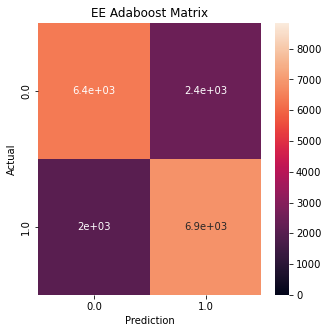

In [47]:
import matplotlib.pyplot as plt
import seaborn as sb

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Prediction'])
plt.figure(figsize=(5,5))
sb.heatmap(confusion_matrix, annot=True, vmin=0, vmax=int(len(y_test)/2))
plt.title('EE Adaboost Matrix')
plt.show()

In [48]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.76      0.72      0.77      0.74      0.75      0.56      8779
        1.0       0.74      0.77      0.72      0.75      0.75      0.56      8894

avg / total       0.75      0.75      0.75      0.75      0.75      0.56     17673



### Support Vector Machine

In [7]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [8]:
y_pred = clf.predict(X_test)

In [11]:
balanced_accuracy_score(y_test, y_pred)

0.7452002609163952

In [12]:
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
cm.to_csv('Resources/DashBoard_CSV/SVM_cm.csv')
cm

,0,1
0,6019,2698
1,1792,7164


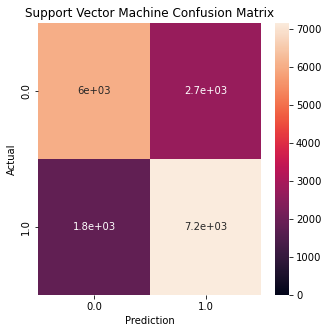

In [19]:
import matplotlib.pyplot as plt
import seaborn as sb

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Prediction'])
plt.figure(figsize=(5,5))
sb.heatmap(confusion_matrix, annot=True, vmin=0)
plt.title('Support Vector Machine Confusion Matrix')
plt.savefig('images/SVM_CM.jpg')
plt.show()

In [ ]:
print(classification_report_imbalanced(y_test, y_pred))